In [64]:
# ilgili kütüphanelerin çekilmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
import numpy as np
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from scipy.stats import shapiro

In [65]:
# verinin çekilmesi
# veri, kalp krizi geçirmiş ve geçirmemiş kişilerin bilgilerinden oluşuyor
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [66]:
# verisetinin ilk 10 sütunu
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [67]:
# değişken isimleri aşağıda verilmiştir
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [68]:
#age->yaş
#sex->cinsiyet
#cp->göğüs ağrısı tipi
#trtbps->dinlenme halinde kan basıncı
#chol->kolestrol
#fbs->açlık kan şekeri
#restecg->dinlenme halinde EKG sonuçları
#thalachh->ulaşılan en yüksek nabız
#exng->egzersize bağlı kalp spazmı
#oldpeak->önceki pikler (ekg)
#slp->eğim (ekg)
#caa->ana damar sayısı
#thall->thal (akdeniz kansızlığı) oranı
#output->kalp krizi geçirdi mi?

In [69]:
# veriseti tanımlayıcı istatistikleri
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
# verisetindeki değişkenlerin tipleri, sınıfları
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


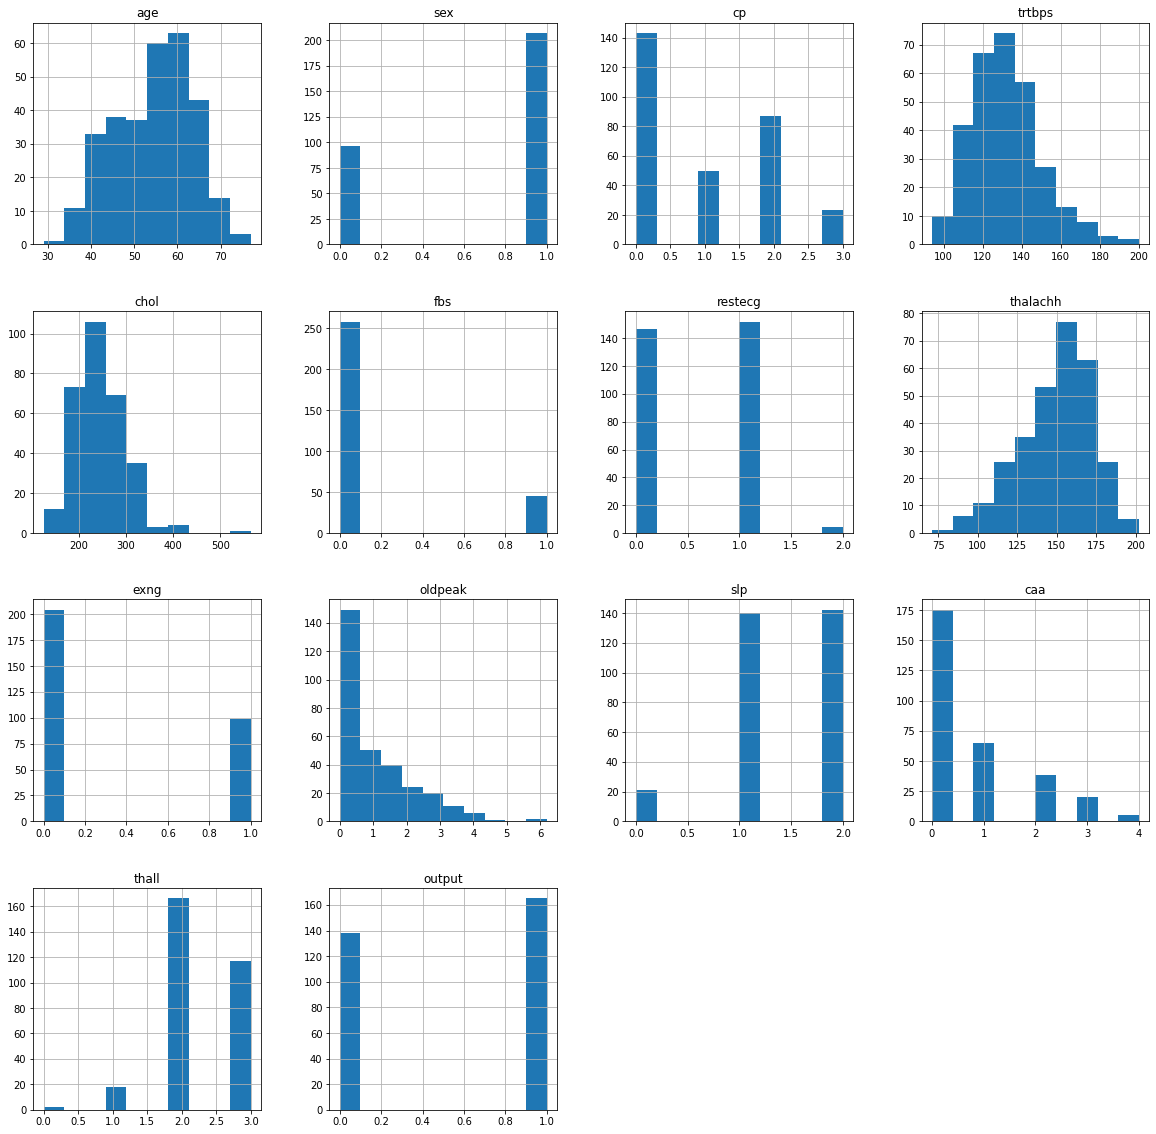

In [71]:
# tüm değişkenlerin histogram özeti
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

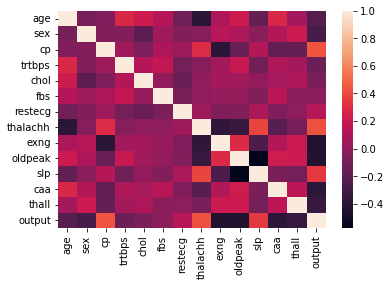

In [72]:
# değişkenlerin birbiri ile olan ilişkisinin ısı haritası
sns.heatmap(df.corr())

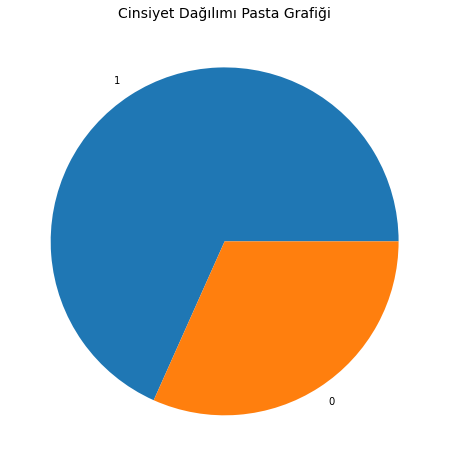

In [73]:
# cinsiyet dağılımının pasta grafiği-kategorik veri gösterimi
# 1-erkek, 0-kadın
labels = df['sex'].value_counts().index.tolist()
values = df['sex'].value_counts().tolist()
plt.figure(figsize=(8, 8))
plt.pie(x=values, labels=labels, )
plt.title("Cinsiyet Dağılımı Pasta Grafiği", fontdict={'fontsize': 14})
plt.show()

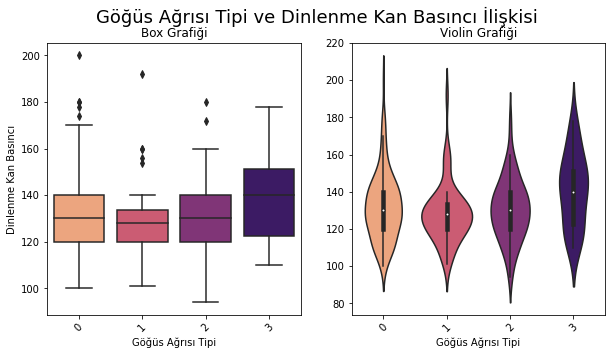

In [74]:
# göğüs ağrısı tipi ile kan basıncı ilişksinin grafik halinde bastırılması
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.boxplot(x='cp', y='trtbps', data=df, ax=ax[0], palette='magma_r')
ax[0].set_title("Box Grafiği")
ax[0].set_xlabel("Göğüs Ağrısı Tipi")
ax[0].set_ylabel("Dinlenme Kan Basıncı")
ax[0].tick_params(axis='x', rotation=45)

sns.violinplot(x='cp', y='trtbps', data=df, ax=ax[1], palette='magma_r')
ax[1].set_title("Violin Grafiği")
ax[1].set_xlabel("Göğüs Ağrısı Tipi")
ax[1].set_ylabel("Dinlenme Kan Basıncı", color='w')
ax[1].tick_params(axis='x', rotation=45)

fig.suptitle("Göğüs Ağrısı Tipi ve Dinlenme Kan Basıncı İlişkisi", fontsize=18)

plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

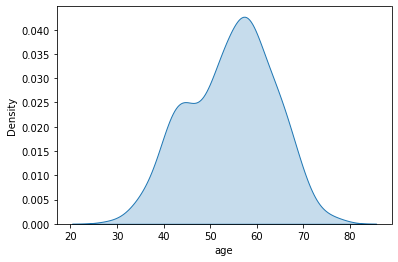

In [75]:
# verisetinde yaş dağılımı
sns.kdeplot(df['age'],label=' Yaş', shade=True)

<AxesSubplot:xlabel='chol', ylabel='Density'>

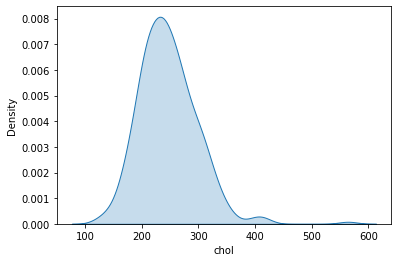

In [76]:
# verisetinde kolesterol oranının dağılımı
sns.kdeplot(df['chol'],shade=True,label='cholestrol')

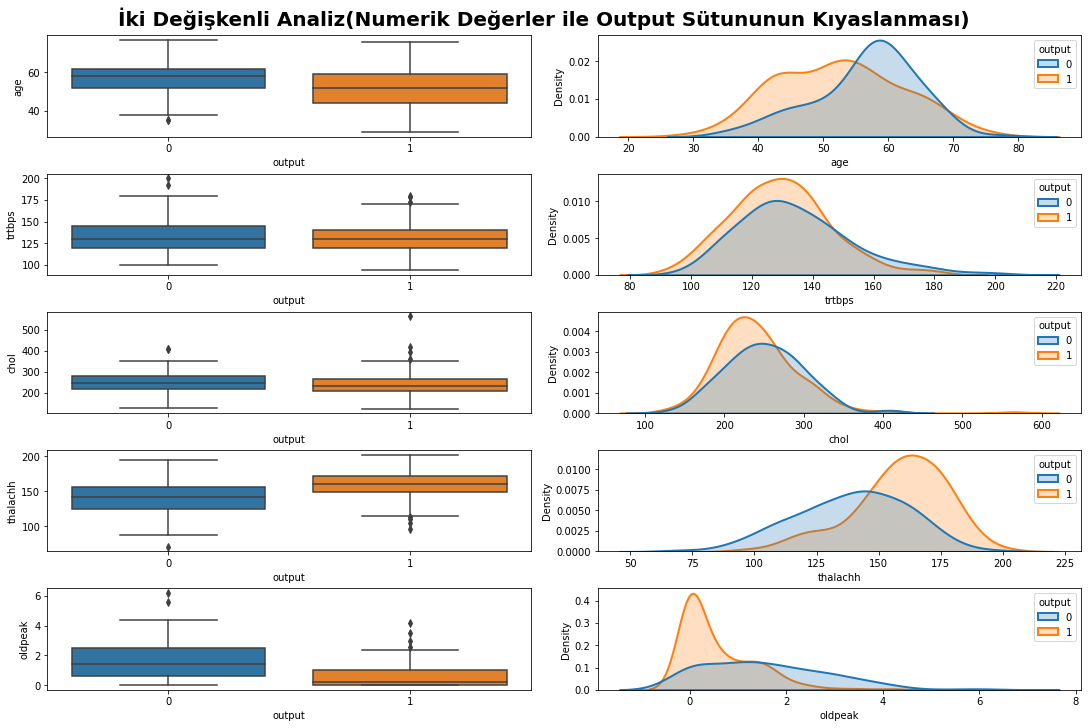

In [77]:
# bu kod satırında numerik değerler ile output(kalp krizi geçirdi mi?) sütunları kıyaslanmaktadır.
# örnek olarak ulaşılan en yüksek nabız(thalachh) arttıkça output-1 yani kalp krizi geçirme artmaktadır.

num_cols=df.loc[:,df.nunique()>5].columns
fig, ax = plt.subplots(ncols=2, nrows=5 ,figsize=(15,10), constrained_layout=True )
plt.suptitle("İki Değişkenli Analiz(Numerik Değerler ile Output Sütununun Kıyaslanması)", size=20, weight='bold')
ax=ax.flatten()
i=0
for a in num_cols:
    if df[a].nunique() >5:
        sns.boxplot(y=df[a],ax=ax[i], x=df['output'])
        i=i+1
        sns.kdeplot(x=df[a],ax=ax[i], hue=df['output'], fill=True, linewidth=2)
        i=i+1

In [78]:
# korelasyon hipotezi için shapiro-wilk testi uygulanmaktadır

# test için verisetinden kopya yeni bir veriseti oluşturulmaktadır.
tests = pd.DataFrame()

# değerler kopyalanan veri setinden alınmaktadır.
resting_blood_pressure = df['trtbps'].values
cholestrol = df['chol'].values
maximum_heart_rate = df['thalachh'].values
fasting_blood_sugar_level = df['fbs'].values
age = df['age'].values

rlist, clist, mlist, flist, xlist = [], [], [], [], []

# tüm değerler için listenin yapılması ve shapiro değerinin iteratif olarak hesaplanmaktadır.
values = [('resting_blood_pressure', resting_blood_pressure, rlist), 
          ('cholestrol', cholestrol, clist), 
          ('maximum_heart_rate', maximum_heart_rate, mlist), 
          ('fasting_blood_sugar_level', fasting_blood_sugar_level, flist),
          ('age', age, xlist)
         ]
for value in values:
    _,prob = shapiro(value[1])
    if prob > 0.05:
        value[2].append("H0")
    else:
        value[2].append("H1")

    tests[f'{value[0]}_shapiro'] = value[2]

tests.head()

,resting_blood_pressure_shapiro,cholestrol_shapiro,maximum_heart_rate_shapiro,fasting_blood_sugar_level_shapiro,age_shapiro
0,H1,H1,H1,H1,H1


In [79]:
# numerik değişkenler için p değerlerinin kıyaslanması
for i in num_cols:
    yes = df[df['output']==1][i]
    no = df[df['output']==0][i]
    stat,p_value=ttest_ind(yes, no)
   
    if p_value < 0.05:
        print(f"{i} özelliği {np.round(p_value,3)} p değeri ile önemli bir farklılığa sahiptir.")
    else:
        print(f"{i} özelliği {np.round(p_value,3)} p değeri ile önemli bir farklılığa sahip değildir.")

age özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
trtbps özelliği 0.012 p değeri ile önemli bir farklılığa sahiptir.
chol özelliği 0.139 p değeri ile önemli bir farklılığa sahip değildir.
thalachh özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
oldpeak özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.


In [80]:
# kategorik değişkenler için p değerlerinin kıyaslanması
cat_cols=df.loc[:,df.nunique()<5].columns

for i in cat_cols:
    crosstab = pd.crosstab(df['output'], df[i])
    stat,p_value,_,_=chi2_contingency(crosstab)
   
    if p_value < 0.05:
        print(f"{i} özelliği {np.round(p_value,3)} p değeri ile önemli bir farklılığa sahiptir.")
    else:
        print(f"{i} özelliği {np.round(p_value,3)} p değeri ile önemli bir farklılığa sahip değildir.")

sex özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
cp özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
fbs özelliği 0.744 p değeri ile önemli bir farklılığa sahip değildir.
restecg özelliği 0.007 p değeri ile önemli bir farklılığa sahiptir.
exng özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
slp özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
thall özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
output özelliği 0.0 p değeri ile önemli bir farklılığa sahiptir.
